# Data Understanding

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('./data/covid19_articles_20201231.csv')

# Date to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop duplicates
num_articles_pre_drop = len(df)
df = df.drop_duplicates(subset='content')
df = df.reset_index(drop=True)
print('no. articles dropped: ', num_articles_pre_drop - len(df))
print('no. of articles: ', len(df))
print(df.info())

no. articles dropped:  127
no. of articles:  368920
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368920 entries, 0 to 368919
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   author      181789 non-null  object        
 1   date        368920 non-null  datetime64[ns]
 2   domain      368920 non-null  object        
 3   title       368835 non-null  object        
 4   url         368920 non-null  object        
 5   content     368920 non-null  object        
 6   topic_area  368920 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 19.7+ MB
None


In [6]:
df.head(3)

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business
1,Thomas Hughes,2020-01-03,marketbeat,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,The labor markets were one of the most closely...,business
2,Steve Anderson,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,"It could be forgiven, that some might think th...",business


### Check NA's

In [7]:
df.isna().sum()

author        187131
date               0
domain             0
title             85
url                0
content            0
topic_area         0
dtype: int64

### Number of Articles per website & Average Article Length

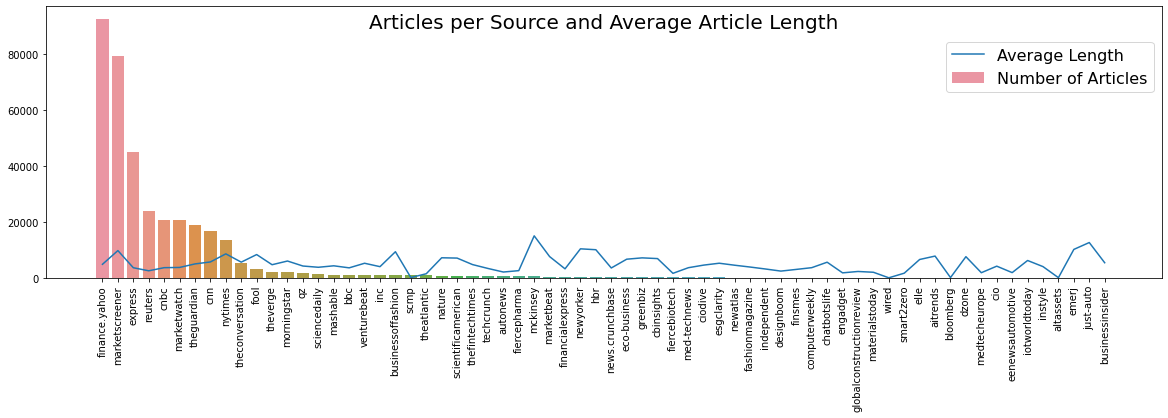

In [8]:
# Articles by domain
count_domain = df.groupby('domain')['content'].count().sort_values(ascending=False)
count_domain = pd.DataFrame(count_domain.reset_index())

sorter = count_domain['domain']

article_length = df.groupby('domain')['content'].apply(lambda x: np.mean(x.str.len()))
article_length = pd.DataFrame(article_length.reset_index())
article_length['domain'] = article_length['domain'].astype('category')
article_length['domain'].cat.set_categories(sorter, inplace = True)
article_length = article_length.sort_values(['domain'])

fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x = 'domain', y = 'content', data = count_domain, label='Number of Articles', ax=ax)
sns.lineplot(x = 'domain', y = 'content', data = article_length, label='Average Length')
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.9))
plt.title('Articles per Source and Average Article Length', y=1, pad=-22, fontsize=20)
plt.savefig('article_nums.png')
None

In [9]:
count_domain[:2].sum()

domain     finance.yahoomarketscreener
content                         172043
dtype: object

### Timing of Articles

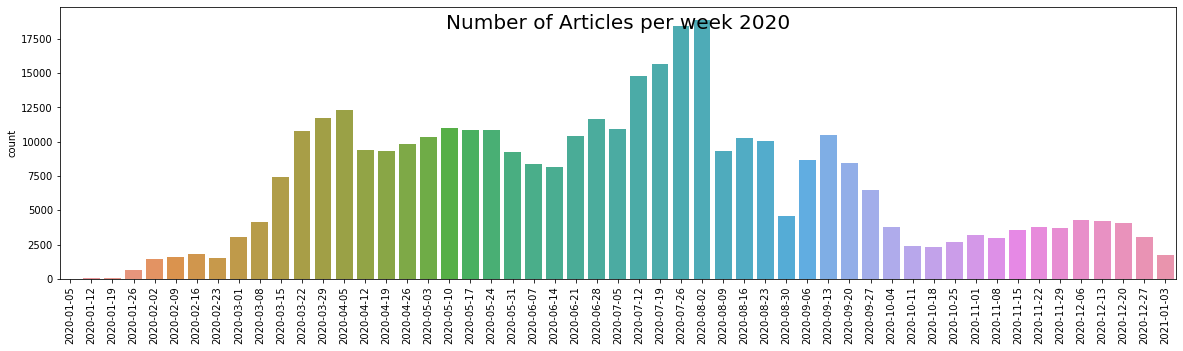

In [10]:
# Timing
import matplotlib.dates as mdates

article_week = df.resample('W', on='date')['content'].count()
article_week = pd.DataFrame(article_week.reset_index())

fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x = 'date', y = 'content', data = article_week, ax=ax)
x_dates = article_week['date'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=90)
plt.ylabel('count')
plt.xlabel(None)
plt.title('Number of Articles per week 2020', y=1, pad=-22, fontsize=20)
None

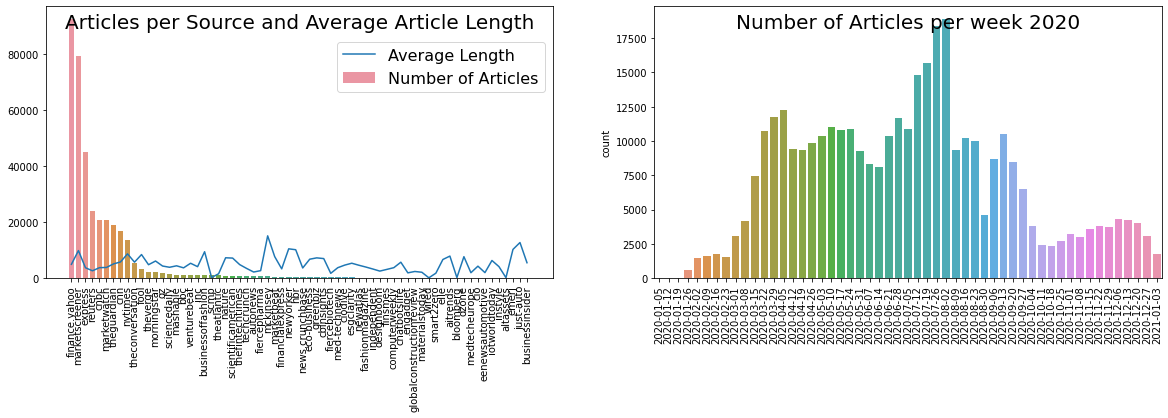

In [11]:
# Articles by domain
count_domain = df.groupby('domain')['content'].count().sort_values(ascending=False)
count_domain = pd.DataFrame(count_domain.reset_index())

sorter = count_domain['domain']

article_length = df.groupby('domain')['content'].apply(lambda x: np.mean(x.str.len()))
article_length = pd.DataFrame(article_length.reset_index())
article_length['domain'] = article_length['domain'].astype('category')
article_length['domain'].cat.set_categories(sorter, inplace = True)
article_length = article_length.sort_values(['domain'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
sns.barplot(x = 'domain', y = 'content', data = count_domain, label='Number of Articles', ax=ax1)
sns.lineplot(x = 'domain', y = 'content', data = article_length, label='Average Length', ax=ax1)
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.9))
ax1.set_title('Articles per Source and Average Article Length', y=1, pad=-22, fontsize=20)

# Timing
import matplotlib.dates as mdates

article_week = df.resample('W', on='date')['content'].count()
article_week = pd.DataFrame(article_week.reset_index())

sns.barplot(x = 'date', y = 'content', data = article_week, ax=ax2)
x_dates = article_week['date'].dt.strftime('%Y-%m-%d')
ax2.set_xticklabels(labels=x_dates, rotation=90)
ax2.set_ylabel('count')
ax2.set_xlabel(None)
ax2.set_title('Number of Articles per week 2020', y=1, pad=-22, fontsize=20)
None

In [12]:
# Article and title length
article_length_dist = df[['title', 'content']].dropna()
article_length_dist['length_content'] = df['content'].apply(lambda x: len(x.split()))
article_length_dist['length_title'] = df['title'].apply(lambda x: len(str(x).split()))

article_length_dist.describe()
article_length_mean = int(article_length_dist['length_content'].mean())
article_length_med = int(article_length_dist['length_content'].median())
title_length_mean = int(article_length_dist['length_title'].mean())
title_length_med = int(article_length_dist['length_title'].median())
print(article_length_mean, article_length_med)
print(title_length_mean, title_length_med)

922 596
11 11


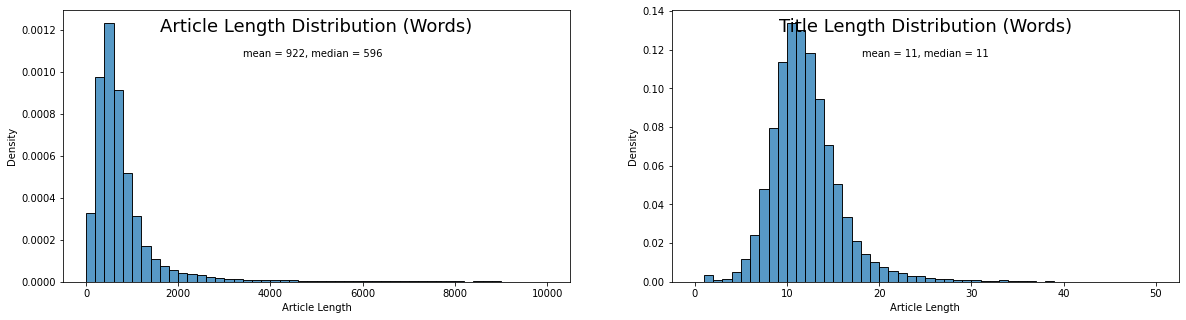

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
sns.histplot(data = article_length_dist['length_content'], binwidth=200, binrange=(0,10000), log_scale=False, stat='density', ax=ax1)
ax1.set_xlabel('Article Length')
ax1.set_title(f'Article Length Distribution (Words)', y=1, pad=-22, fontsize=18)
plt.figtext(.25,.75, f'mean = {article_length_mean}, median = {article_length_med}')

sns.histplot(data = article_length_dist['length_title'], binwidth=1, binrange=(0,50), log_scale=False, stat='density', ax=ax2)
ax2.set_xlabel('Article Length')
ax2.set_title('Title Length Distribution (Words)', y=1, pad=-22, fontsize=18)
plt.figtext(.68,.75, f'mean = {title_length_mean}, median = {title_length_med}')

plt.savefig('length_dist.png')
None

### Articles that are annual reports

In [14]:
annual_reports = df[df['title'].str.contains("Annual Report", na=False)].reset_index()
annual_reports

,index,author,date,domain,title,url,content,topic_area
0,4986,NaN,2020-02-13,marketscreener,Woodside Petroleum : Full-Year 2019 Results Br...,https://www.marketscreener.com/quote/stock/WOO...,ASX Announcement Woodside Petroleum Ltd. ACN 0...,business
1,8499,NaN,2020-02-27,marketscreener,PPHE Hotel : Annual Results & Publication of A...,https://www.marketscreener.com/PPHE-HOTEL-GROU...,27 February 2020 PPHE HOTEL GROUP LIMITED\n ...,business
2,8913,NaN,2020-02-27,marketscreener,Acushnet : Annual Report,https://www.marketscreener.com/quote/stock/ACU...,Table of Contents UNITED STATES SECURITIES AND...,business
3,10848,NaN,2020-03-03,marketscreener,Apax Global Alpha : 2019 Annual Report and Acc...,https://www.marketscreener.com/APAX-GLOBAL-ALP...,RNS Number : 7690E Apax Global Alpha Limited 0...,business
4,10906,NaN,2020-03-03,marketscreener,Københavns Lufthavne A/S : Annual Report for 2019,https://www.marketscreener.com/K-BENHAVNS-LUFT...,"Company AnnouncementCopenhagen, 3 March 2020 A...",business
...,...,...,...,...,...,...,...,...
269,358970,NaN,2020-12-10,marketscreener,Costco Wholesale : FY 2020 Annual Report 2.6 MB,https://www.marketscreener.com/quote/stock/COS...,2020 ANNUAL REPORT FISCAL YEAR ENDED AUGUST 30...,business
270,360515,NaN,2020-12-14,marketscreener,Getech : 2019 Annual Report & Accounts,https://www.marketscreener.com/quote/stock/GET...,d a t a Getech Group plc ANNUAL REPORT k n o w...,business
271,361020,NaN,2020-12-15,marketscreener,Chemring : Annual Report and Accounts 2020,https://www.marketscreener.com/quote/stock/CHE...,Chemring Group PLC Annual report and accounts ...,business
272,361891,NaN,2020-12-16,marketscreener,Scotts Miracle Gro : 2020 Annual Report,https://www.marketscreener.com/quote/stock/THE...,The Scotts Miracle-Gro Company 2020 Annual Rep...,business


In [15]:
annual_reports[:2]

,index,author,date,domain,title,url,content,topic_area
0,4986,NaN,2020-02-13,marketscreener,Woodside Petroleum : Full-Year 2019 Results Br...,https://www.marketscreener.com/quote/stock/WOO...,ASX Announcement Woodside Petroleum Ltd. ACN 0...,business
1,8499,NaN,2020-02-27,marketscreener,PPHE Hotel : Annual Results & Publication of A...,https://www.marketscreener.com/PPHE-HOTEL-GROU...,27 February 2020 PPHE HOTEL GROUP LIMITED\n ...,business


In [16]:
annual_report_lengths = []
for row in range(len(annual_reports)):
    annual_report_lengths.append(len(annual_reports.loc[row]['content']))

print(min(annual_report_lengths))
print(max(annual_report_lengths))
print((round(np.mean(annual_report_lengths),0)))

1171
857551
120195.0


### Long Articles

In [17]:
long_articles = df[df['content'].str.len() >= 50000]#.reset_index()
long_articles

,author,date,domain,title,url,content,topic_area
975,Motley Fool Transcribers,2020-01-28,fool,United Technologies Corp (UTX) Q4 2019 Earning...,https://www.fool.com/earnings/call-transcripts...,United Technologies Corp (NYSE:RTX)Q4 2019 Ear...,business
977,Motley Fool Transcribers,2020-01-28,fool,3M Co (MMM) Q4 2019 Earnings Call Transcript,https://www.fool.com/earnings/call-transcripts...,"3M Co (NYSE:MMM)Q4 2019 Earnings CallJan 28, 2...",business
1314,Motley Fool Transcribers,2020-01-29,fool,General Electric Company (GE) Q4 2019 Earnings...,https://www.fool.com/earnings/call-transcripts...,General Electric Company (NYSE:GE)Q4 2019 Earn...,business
1319,Motley Fool Transcribers,2020-01-29,fool,Boeing Co (BA) Q4 2019 Earnings Call Transcript,https://www.fool.com/earnings/call-transcripts...,Boeing Co (NYSE:BA)Q4 2019 Earnings CallJan 29...,business
1611,Motley Fool Transcribers,2020-01-30,fool,Illumina Inc (ILMN) Q4 2019 Earnings Call Tran...,https://www.fool.com/earnings/call-transcripts...,Illumina Inc (NASDAQ:ILMN)Q4 2019 Earnings Cal...,business
...,...,...,...,...,...,...,...
365475,NaN,2020-12-22,marketscreener,NIKE : Q2FY21 EARNINGS CALL OFFICIAL TRANSCRIPT,https://www.marketscreener.com/quote/stock/NIK...,FY 2021 Q2 Earnings Release Conference Call Tr...,business
365932,NaN,2020-12-23,marketscreener,SouthGobi Resources : announces second quarter...,https://www.marketscreener.com/quote/stock/SOU...,"HONG KONG, Dec. 23, 2020 (GLOBE NEWSWIRE) --...",business
367350,NaN,2020-12-28,marketscreener,Merck : LYNPARZA® (olaparib) Receives Three Ne...,https://www.marketscreener.com/quote/stock/MER...,Approvals in Three Types of Cancer Are Based o...,business
367702,NaN,2020-12-29,marketscreener,Ingles Markets Incorporated : Download the 202...,https://www.marketscreener.com/quote/stock/ING...,"INGLES MARKETS, INCORPORATED P.O. BOX 6676 ASH...",business


In [9]:
article_idx = 975
print(len(df.loc[article_idx]['content']))
df.loc[article_idx]['content']

53861


"United Technologies Corp\xa0(NYSE:RTX)Q4\xa02019 Earnings CallJan 28, 2020, 8:00 a.m. ET Good morning and welcome to the United Technologies' Fourth Quarter 2019 Earnings Conference Call. On the call today are, Greg Hayes, Chairman and Chief Executive Officer; Neil Mitchill, Acting Senior Vice President and Chief Financial Officer; and Nathan Ware, Senior Director, Investor Relations. This call is being carried live on the Internet and there is a presentation available for download from UTC's website at www.utc.com. Please note, except where otherwise noted, the Company will speak to results from continuing operations, excluding restructuring costs and other significant items of a non-recurring and or non-operational nature, often referred to by management as other significant items. The Company also reminds listeners that the earnings and cash flow expectation and other forward-looking statements provided on this call are subject to risk and uncertainties. UTC's SEC filings including

In [10]:
df.head(1)

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business


In [29]:
df['content'][1400]

'Read the latest developments in the coronavirus outbreak here. The State Department on Thursday night issued a travel advisory telling Americans not to travel to China because of the public health threat posed by the coronavirus. Secretary of State Mike Pompeo confirmed the travel advisory on Twitter. The department set the new advisory at Level 4, or Red, its highest caution, which is reserved for the most dangerous situations. The World Health Organization declared on Thursday that the new coronavirus outbreak was a global health emergency, acknowledging that the disease represents a risk outside of China, where it emerged last month. The declaration — officially called a Public Health Emergency of International Concern — serves notice to all United Nations member states that the world’s top health advisory body rates the situation as serious. Countries can then decide whether to close their borders, cancel flights, screen people arriving at airports or take other measures. The deci